Heart Disease Prediction using Machine Learning Approach
Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:

116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non- anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. Heartdisease: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

# Load Data

In [131]:
#import impostant libaries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')



# First look at data

In [134]:
#look at the data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [135]:
#see the number of rows and columns
df.shape

(918, 12)

In [136]:
#look at the features
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [137]:
#look at null values
df.isna().sum().sum()

0

In [138]:
#check if there any duplicates
df.duplicated().sum()

0

In [139]:
#see type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [140]:
#look at some statistics 
df.describe().style.background_gradient()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


Text(0.5, 1.0, 'Heatmap')

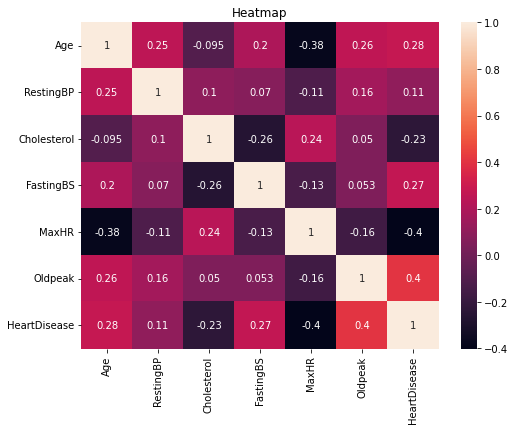

In [141]:
#look at the corelation between features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")

Text(0.5, 1.0, 'Heatmap')

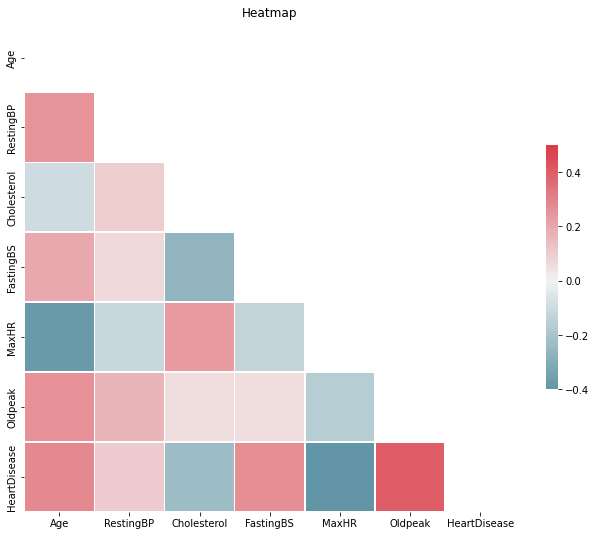

In [142]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Heatmap")

In [143]:
#function to look at unique values in each feature
def unique_values (data_set):
  col = []
  col_unique = []
  col_nunique = []
  for i in data_set.columns:

    col.append(i)
    col_unique.append(data_set[i].unique())
    col_nunique.append(data_set[i].nunique())
  return pd.DataFrame({'columns' : col , 'uniques' : col_unique , ' nunique' : col_nunique})


In [144]:
#show unique values and number of them in eah feature
unique_values(df)

,columns,uniques,nunique
0,Age,"[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...",50
1,Sex,"[M, F]",2
2,ChestPainType,"[ATA, NAP, ASY, TA]",4
3,RestingBP,"[140, 160, 130, 138, 150, 120, 110, 136, 115, ...",67
4,Cholesterol,"[289, 180, 283, 214, 195, 339, 237, 208, 207, ...",222
5,FastingBS,"[0, 1]",2
6,RestingECG,"[Normal, ST, LVH]",3
7,MaxHR,"[172, 156, 98, 108, 122, 170, 142, 130, 120, 9...",119
8,ExerciseAngina,"[N, Y]",2
9,Oldpeak,"[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...",53


#Functions

In [145]:
#function to diplay boxplot of four features
def plot_box(f1,f2,f3,f4):
   fig,axes=plt.subplots(2,2,figsize=(15,12))
   sns.boxplot(data=df,x=f1,ax=axes[0,0]).set_title(f1)
   sns.boxplot(data=df,x=f2,ax=axes[0,1]).set_title(f2)
   sns.boxplot(data=df,x=f3,ax=axes[1,0]).set_title(f3)
   sns.boxplot(data=df,x=f4,ax=axes[1,1]).set_title(f4)

In [146]:
#function to get classification report
def get_report(ytest,ypred):
  from sklearn.metrics import classification_report
  print(classification_report(ytest,ypred))

In [147]:
#function to get confusion matrix
def get_confm(ytest,ypred):
  from sklearn.metrics import confusion_matrix
  conf_m=confusion_matrix(ytest,ypred)
  sns.heatmap(conf_m,annot=True,cmap='plasma')
  plt.title("Confusion Matrix",fontsize=14)


# plot_confusion_matrix(classifier, X_test, y_test,cmap='plasma')
# plt.title('Naive: Confusion Matrix', fontsize=14)
# plt.show()

In [148]:
#function to check Errors
def check_Errors(ytest,ypred):
  from sklearn import metrics

  accuracy=metrics.accuracy_score(ytest,ypred)
  precision=metrics.precision_score(ytest,ypred)
  f1_score=metrics.f1_score(ytest,ypred)
  recall=metrics.recall_score(ytest,ypred)

  print(f"Accuracy score of model is: {100*accuracy:.3} %")
  print(f"precision score of model is: {100*precision:.3} %")
  print(f"f1_score score of model is: {100*f1_score:.3} %")
  print(f"recall score of model is: {100*recall:.3} %")

In [149]:
#function to plot ROC curve and get AUC
def plot_roc(ytest,ypredp):
  from sklearn.metrics import roc_curve,roc_auc_score
  fbr,tbr,thresholds=roc_curve(ytest,ypredp[:,1])
  plt.plot(fbr,tbr)
  plt.plot([0,1],[0,1],'k--',c='red')
  plt.xlabel("False Postive Rate")
  plt.ylabel("True Postive Rate")
  plt.title("ROC Curve")
  plt.show()
  print('______________________________________________________________')
  print(" ")
  auc=roc_auc_score(ytest,ypredp[:,1])
  print(f"AUC is: {100*auc:.3} %")

In [150]:
#func to check model
def check_model(ytest,ypred):
   get_report(ytest,ypred)
   print("______________________________________________________________________________")  
   print(" ")
   get_confm(ytest,ypred)
   print(" ")
   check_Errors(ytest,ypred)
   print(" ")
   print("______________________________________________________________________________")  
   print(" ")


# EDA

In [151]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Distrubtion of heart diseases**

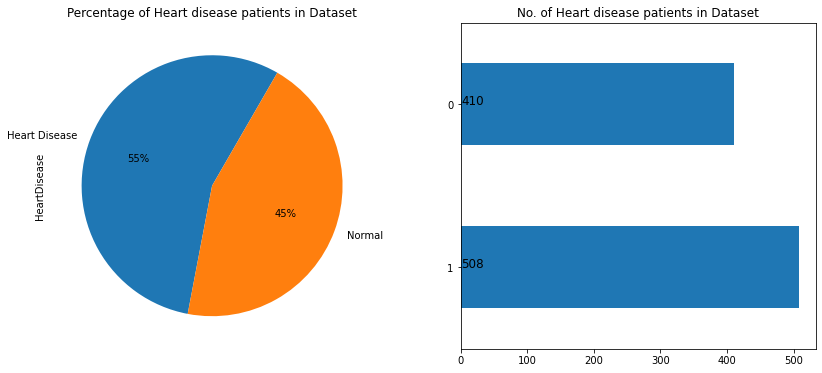

In [152]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['HeartDisease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["HeartDisease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["HeartDisease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 508 abnormal and 410 normal patient

**Checking Gender & Agewise Distribution**

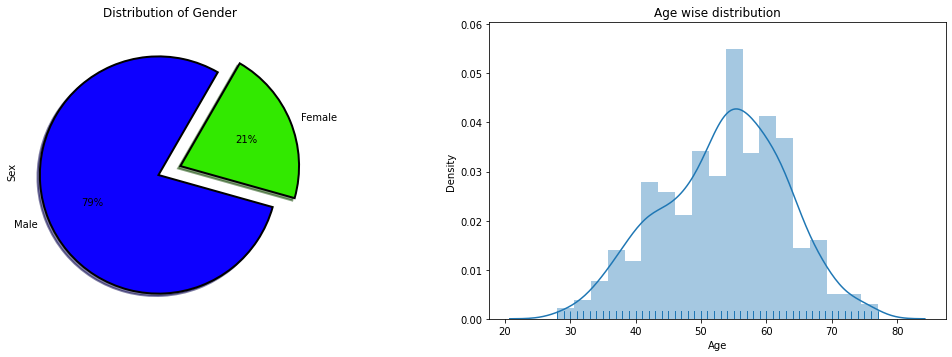

In [153]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['Age'], rug=True)
plt.title("Age wise distribution")
plt.show()

The precantge of male is greater than females

age range from 20 to 80

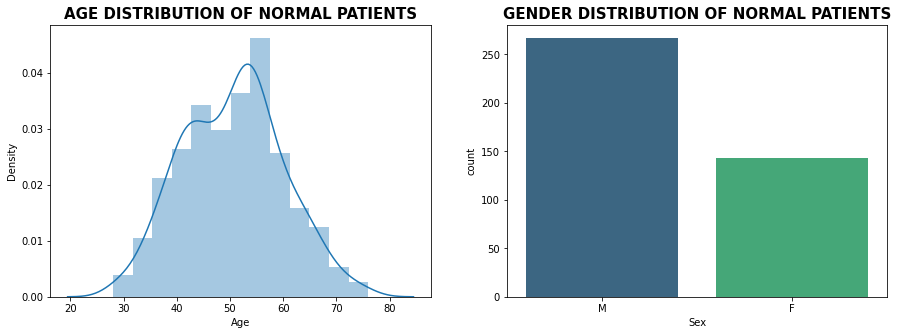

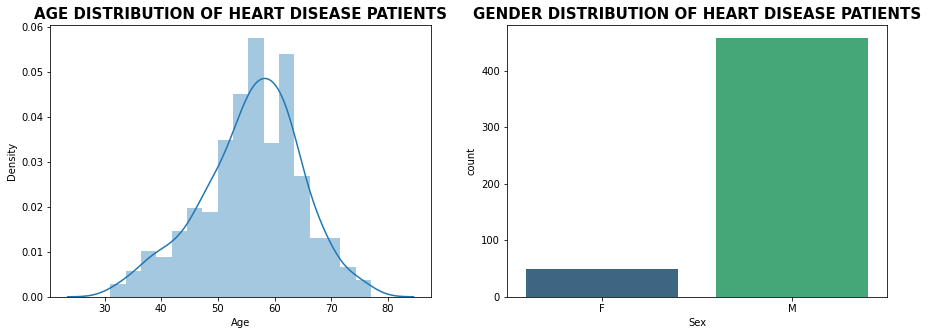

In [154]:
# creating separate df for normal and heart patients

attr_1=df[df['HeartDisease']==1]

attr_0=df[df['HeartDisease']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

patient have greater age than normal people

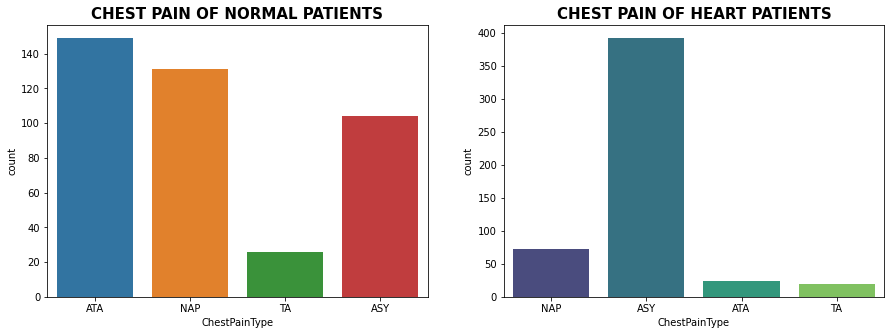

In [155]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['ChestPainType'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['ChestPainType'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

Chestpaintype ASY are most heartpatients

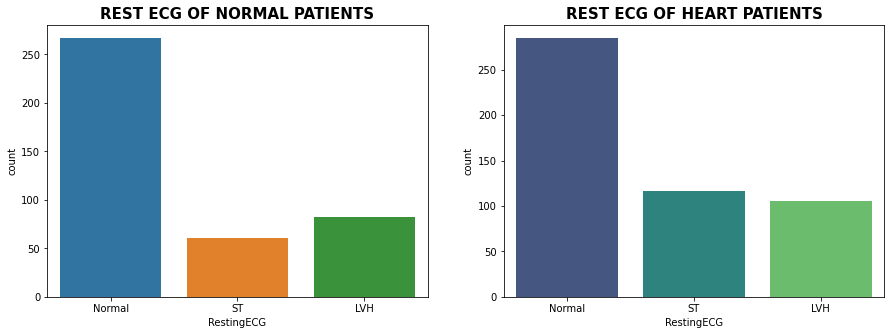

In [156]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['RestingECG'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['RestingECG'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

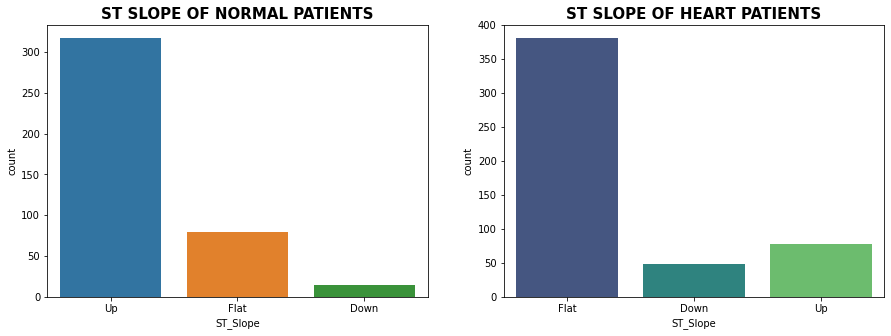

In [157]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['ST_Slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['ST_Slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

most heart patient is with *flat* St_slope
while normal with *UP*

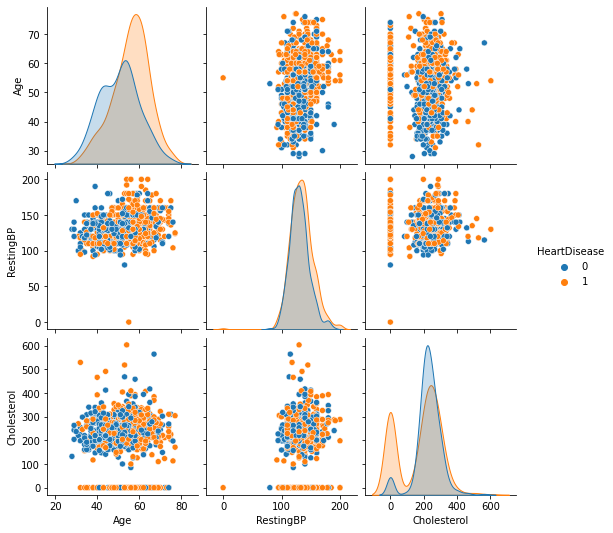

In [158]:
sns.pairplot(df, hue = 'HeartDisease', vars = ['Age', 'RestingBP', 'Cholesterol'] )

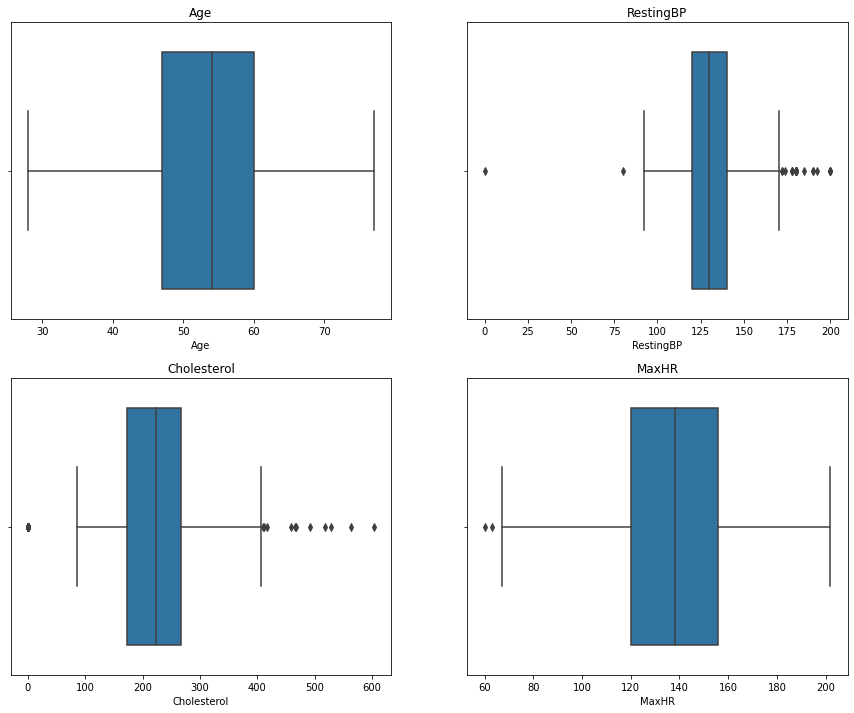

In [159]:
#look at outliers
plot_box('Age','RestingBP','Cholesterol','MaxHR')

There is outliers in Cholestrol and Resting BP so we need to remove them because they will affect the preformance if the model

In [160]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

df_numeric = df[['Age','RestingBP','Cholesterol','MaxHR']]

In [161]:
df_numeric.head()

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [162]:
# calculating zscore of numeric columns in the dataset
from scipy import stats
z = np.abs(stats.zscore(df_numeric))
print(z)



     Age  RestingBP  Cholesterol  MaxHR
0   1.43       0.41         0.83   1.38
1   0.48       1.49         0.17   0.75
2   1.75       0.13         0.77   1.53
3   0.58       0.30         0.14   1.13
4   0.05       0.95         0.03   0.58
..   ...        ...          ...    ...
913 0.90       1.21         0.60   0.19
914 1.54       0.63         0.05   0.16
915 0.37       0.13         0.62   0.86
916 0.37       0.13         0.34   1.46
917 1.65       0.30         0.22   1.42

[918 rows x 4 columns]


In [163]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([ 76, 109, 149, 241, 365, 390, 399, 449, 592, 616, 732, 759]), array([2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1]))


In [164]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]

In [165]:
df.shape
#now the data have no outliers

(906, 12)

# Prediction Models

**Applying label encoder**

In [166]:
#we must change categorical data to numeric data so that the model can fit on them better


from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG','ExerciseAngina', 'ST_Slope']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


now we make all the data numeric

now lets split the data into train and test 

In [167]:
# x is the input to the model and y is tha output

x = df.drop(['HeartDisease'],axis=1)

y = df['HeartDisease']

In [168]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [169]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    402
0    322
Name: HeartDisease, dtype: int64
Distribution of traget variable in test set
1    96
0    86
Name: HeartDisease, dtype: int64


In [170]:
print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(724, 11)
(724,)
------------Test Set------------------
(182, 11)
(182,)


Now lets use normlization to make all values from of dataset from 0 to 1

In [171]:
#apply Normization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[['Age','RestingBP','Cholesterol','MaxHR','ST_Slope']] = scaler.fit_transform(x_train[['Age','RestingBP','Cholesterol','MaxHR','ST_Slope']])

x_test[['Age','RestingBP','Cholesterol','MaxHR','ST_Slope']] = scaler.transform(x_test[['Age','RestingBP','Cholesterol','MaxHR','ST_Slope']])

In [172]:
#check the normlization
x_train.head()
#the range of values now is from 0 to 1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
377,0.76,1,0,0.77,0.00,1,2,0.42,0,1.20,0.50
308,0.61,1,0,0.26,0.00,1,1,0.54,0,0.50,1.00
531,0.73,1,0,0.58,0.62,1,2,0.37,1,1.80,0.50
86,0.76,1,0,0.89,0.54,1,1,0.35,1,2.00,0.50
509,0.61,1,0,0.20,0.40,0,1,0.34,0,0.00,0.50


Now we will you use lazy classifier model which will help us to know the most model with highest accuracy and less time taken so that we could use them instead of others

## LazyModel

In [173]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True )
models, predictions = clf.fit(x_train, x_test, y_train, y_pred)
models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 29/29 [00:01<00:00, 21.60it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.54,0.55,0.55,0.54,0.05
LGBMClassifier,0.54,0.54,0.54,0.55,0.07
QuadraticDiscriminantAnalysis,0.54,0.54,0.54,0.54,0.02
BernoulliNB,0.54,0.54,0.54,0.54,0.01
NuSVC,0.53,0.53,0.53,0.53,0.04
GaussianNB,0.53,0.53,0.53,0.53,0.02
Perceptron,0.52,0.52,0.52,0.51,0.02
XGBClassifier,0.52,0.52,0.52,0.52,0.07
LogisticRegression,0.52,0.52,0.52,0.52,0.03


**As we can see that XGB,SVC and Random Forest are models with highest accuracy so we will foucus on them**|

**We'll first try to see the performance without applying feature selection methods, and see if we can increase number of features and get same or better scorer**

## SVM Model

In [174]:
from sklearn.svm import SVC

svm_model  = SVC(probability=True)
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        86
           1       0.86      0.91      0.88        96

    accuracy                           0.87       182
   macro avg       0.88      0.87      0.87       182
weighted avg       0.87      0.87      0.87       182

______________________________________________________________________________
 
 
Accuracy score of model is: 87.4 %
precision score of model is: 86.1 %
f1_score score of model is: 88.3 %
recall score of model is: 90.6 %
 
______________________________________________________________________________
 


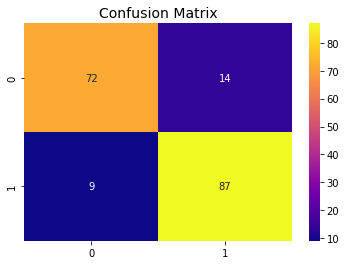

In [175]:
check_model(y_test,y_pred)

In [176]:
y_predp=svm_model.predict_proba(x_test)

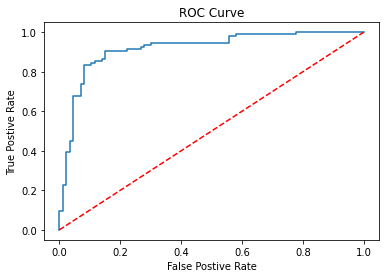

______________________________________________________________
 
AUC is: 91.7 %


In [177]:
plot_roc(y_test,y_predp)

## Logistic Regression Model

In [178]:
from sklearn.linear_model import LogisticRegression

LG_model=LogisticRegression()

LG_model.fit(x_train,y_train)

y_pred=LG_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        86
           1       0.88      0.85      0.87        96

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.86      0.86       182

______________________________________________________________________________
 
 
Accuracy score of model is: 86.3 %
precision score of model is: 88.2 %
f1_score score of model is: 86.8 %
recall score of model is: 85.4 %
 
______________________________________________________________________________
 


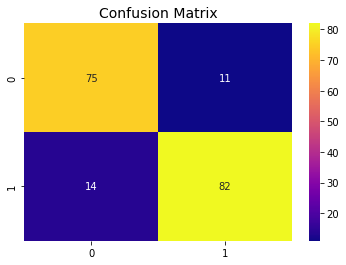

In [179]:
check_model(y_test,y_pred)

In [180]:
y_predp=LG_model.predict_proba(x_test)

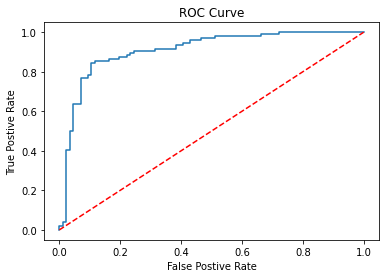

______________________________________________________________
 
AUC is: 90.8 %


In [181]:
plot_roc(y_test,y_predp)

**Now Lets try More Complex Model**



## Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier()

RF_model.fit(x_train,y_train)

y_pred=RF_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        86
           1       0.89      0.88      0.88        96

    accuracy                           0.88       182
   macro avg       0.88      0.88      0.88       182
weighted avg       0.88      0.88      0.88       182

______________________________________________________________________________
 
 
Accuracy score of model is: 87.9 %
precision score of model is: 89.4 %
f1_score score of model is: 88.4 %
recall score of model is: 87.5 %
 
______________________________________________________________________________
 


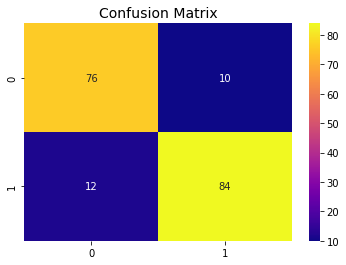

In [183]:
check_model(y_test,y_pred)

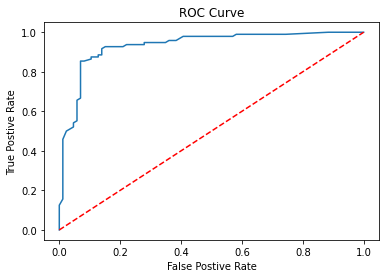

______________________________________________________________
 
AUC is: 93.3 %


In [184]:
y_predp=RF_model.predict_proba(x_test)
plot_roc(y_test,y_predp)

## XGBOOST

In [185]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_train,y_train)

y_pred=xgb_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        86
           1       0.91      0.86      0.89        96

    accuracy                           0.88       182
   macro avg       0.88      0.89      0.88       182
weighted avg       0.89      0.88      0.88       182

______________________________________________________________________________
 
 
Accuracy score of model is: 88.5 %
precision score of model is: 91.2 %
f1_score score of model is: 88.8 %
recall score of model is: 86.5 %
 
______________________________________________________________________________
 


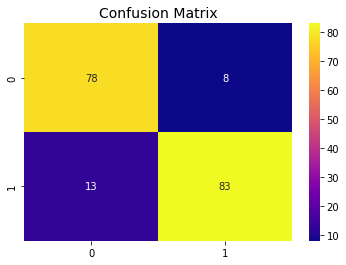

In [186]:
check_model(y_test,y_pred)

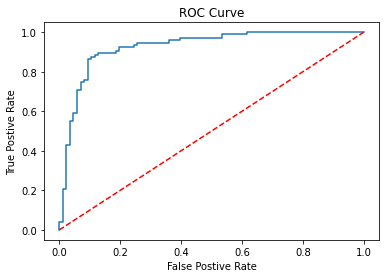

______________________________________________________________
 
AUC is: 92.6 %


In [187]:
y_predp=xgb_model.predict_proba(x_test)
plot_roc(y_test,y_predp)

**These dataset is a medical dataset which considerd a sensitive dataset so wem must focus at recall score in evaluation because it show the relation between truue positive and false negative ,f1=TP/TP+FN**

**As we can see the highest recall score we reach at svm model so we will hypertuning on it to increase the recall score**

In [79]:
# HyperTuning on SVM

#import necessary libraries 
from sklearn.model_selection import GridSearchCV 
#create a dictionary of parameters to be tuned 
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} 
svc = SVC() 
clf = GridSearchCV(svc, parameters) 
clf.fit(x_train,y_train) #perform hypertuning on the model  
print(clf.best_params_) #print out the best parameter

{'C': 1, 'kernel': 'rbf'}


In [80]:
from sklearn.svm import SVC

svm_model  = SVC(probability=True,C=1.0, kernel= 'rbf')
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

**Hypertuning on XGBOOST**

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

params = {'max_depth' : [None,1, 3, 5,6,8],
          'n_estimators' : [10,100]
          }


grid = GridSearchCV(xgb, param_grid = params, cv = 100)

grid.fit(x_train , y_train)

print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 100}


In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

params = {'max_depth' : [None,1, 3, 5,6,8],
          'n_estimators' : [10,300]
          }


grid = GridSearchCV(xgb, param_grid = params, cv = 100)

grid.fit(x_train , y_train)

print(grid.best_params_)

{'max_depth': 1, 'n_estimators': 300}


In [85]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=1,n_estimators=300)

xgb_model.fit(x_train,y_train)

y_pred=xgb_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        86
           1       0.88      0.86      0.87        96

    accuracy                           0.87       182
   macro avg       0.87      0.87      0.87       182
weighted avg       0.87      0.87      0.87       182

______________________________________________________________________________
 
 
Accuracy score of model is: 86.8 %
precision score of model is: 88.3 %
f1_score score of model is: 87.4 %
recall score of model is: 86.5 %
 
______________________________________________________________________________
 


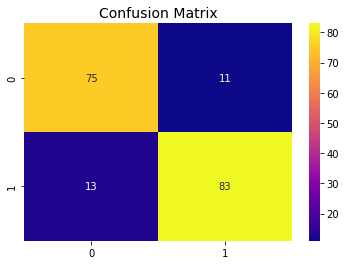

In [86]:
check_model(y_test,y_pred)

In [75]:
from imblearn.over_sampling import SMOTE
ros=SMOTE()
x_ros, y_ros = ros.fit_resample(x_train,y_train)

In [76]:
from sklearn.svm import SVC

svm_model  = SVC(probability=True)
svm_model.fit(x_ros,y_ros)

y_pred = svm_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        86
           1       0.88      0.88      0.88        96

    accuracy                           0.87       182
   macro avg       0.87      0.87      0.87       182
weighted avg       0.87      0.87      0.87       182

______________________________________________________________________________
 
 
Accuracy score of model is: 87.4 %
precision score of model is: 88.4 %
f1_score score of model is: 88.0 %
recall score of model is: 87.5 %
 
______________________________________________________________________________
 


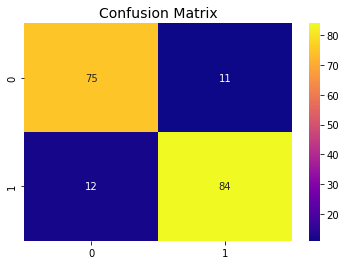

In [77]:
check_model(y_test,y_pred)

I tried oversampling to increase number of data but it doesnt improve the model

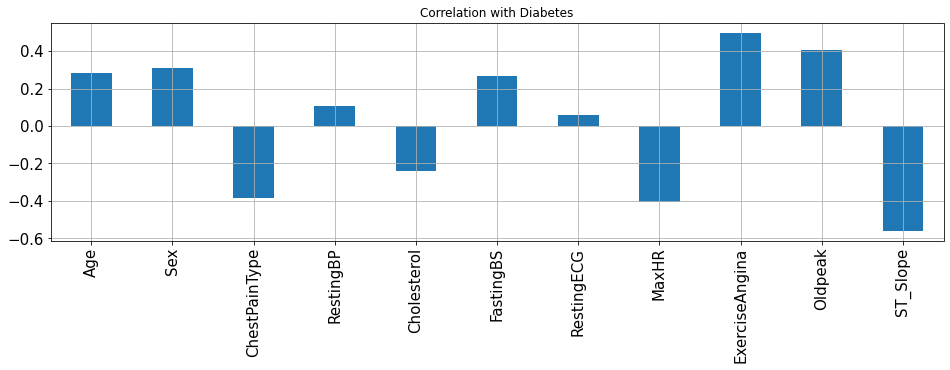

In [97]:
#Correlation with Response Variable class

x.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [196]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

# params = {'n_estimators' : [50,100,150,200,], 'min_samples_split' : [2,4,6,8,10], 'max_depth' : ['Any', 100, 300]}

# grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = 100)

# grid_rf.fit(x_train, y_train)

# print(grid_rf.best_params_)

# #'max_depth': 150, 'min_samples_split': 6, 'n_estimators': 100

# #{'max_depth': 300, 'min_samples_split': 10, 'n_estimators': 50}

# #I've commented the previous code after execution because it took a very long time , but here are the best parameters

#i doesnt make too much diffrence in scores

#**At the end the SVM was best model wih recall score with accuracy 90% the score is not too muvh high but these is becauseof small dataset but if there is more patient the model will fit more and accuracy will increase**